# Re-doing the Iris analysis - Using a Naive Bayes Classifier

## Introduction

In this notebook I will re-do the Iris data analysis using a naive Bayes classifier. I will collect pieces and snippets from our [textbook](http://bit.ly/2xoFamE) and combine them in my own classification of the Iris data set using a naive Bayes classifier.

I will setup the analysis using the generic Scikit-Learn steps as explained in the book. I will explain each step in a markdown cell, using my own words.

## Research question
Can I predict the species of various types of iris flowers based on the different length and width of the petal and sepal leafs? Which information is better to predict with?

## Analysis
I try to assign a flower to its iris species by using the classifiers petal and sepal. Furthermore I want to know which information gives the most significant data.

### 1. load the iris data set (see Introducing Scikit-Learn)
The data set is about different species of iris flowers with their sepal length and width such as the pedal length and width. The data set "iris" is gathered from the seaborn package which contains several data sets.

In [1]:
import numpy as np
#import plotting library
import matplotlib.pyplot as plt
#import scikit-learn for classification
from sklearn import svm, datasets

#load the dataset
iris = datasets.load_iris();

### 2. create a feature matrix X and a target array y from the data set
The feature matrix "X_iris" is the data set of our iris flowers without the column "species". So it is just the data we need to classify the species. "y_iris" is our target matrix which means that it is the name of our species gathered from the data set of our iris flowers. We do this to properly analyze the species data and can assign the species name to them.

In [2]:
#exclude column 4; only select petal data
Xpetal = iris.data[:, 2:4]
#species as our target set
Ypetal = iris.target

#excludes column 2; only select sepal data
Xsepal = iris.data[:,:2]
#species as our target set
Ysepal = iris.target

### 3. split the data in a test and train set
I split the data in a test and a train set to first train the algorithms on the train set and then apply it on the test set to get results. By trial and error I found out that the best accuracy is to define the test set size of 0.3 for sepal data and 0.1 for petal data.

In [8]:
#import train_test_split from scikit-learn
from sklearn.cross_validation import train_test_split
#petal
Xpetal_learn, Xpetal_test, Ypetal_learn, Ypetal_test = train_test_split(Xpetal, Ypetal, test_size=0.1, random_state = 0)

#sepal
Xsepal_learn, Xsepal_test, Ysepal_learn, Ysepal_test = train_test_split(Xsepal, Ysepal, test_size=0.3, random_state = 0)

### 4. fit the model using the train set, applying the naive Bayes classifier
I use the Naive Bayes import of scikit-learn and fit it to the sepal and petal data.

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xpetal_learn, Ypetal_learn)
model.fit(Xsepal_learn, Ysepal_learn)

GaussianNB(priors=None)

### 5. evaluate the model by predicting the test set
[_describe how you are going to evaluate the results of your classifier and what it means_]

[1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
Accuracy with petal is:  0.533333333333


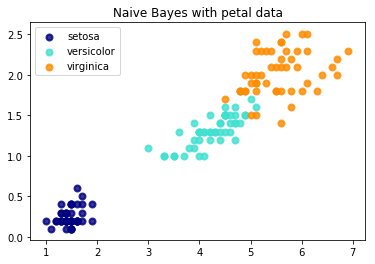

[1 1 0 2 0 2 0 2 2 1 1 2 1 2 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 1 1 1 2 0 2 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Accuracy of prediction with sepal is:  0.8


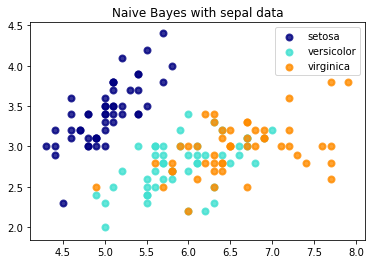

In [9]:
#import to display the accuracy
from sklearn.metrics import accuracy_score
#predict the result for the petal
resultPetal = model.predict(Xpetal_test)
#print the predicted result and the result of test set
print(resultPetal)
print(Ypetal_test)

#print the accuracy of the petal prediction
print("Accuracy with petal is: ", accuracy_score(Ypetal_test, resultPetal))

target_names = iris.target_names
plt.figure()
plt.title("Naive Bayes with petal data")
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xpetal[Ypetal == i, 0], Xpetal[Ypetal == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

#sepal
resultSepal = model.predict(Xsepal_test)
print(resultSepal)
print(Ysepal_test)


print("Accuracy of prediction with sepal is: ", accuracy_score(Ysepal_test, resultSepal))

target_names = iris.target_names
plt.figure()
plt.title("Naive Bayes with sepal data")
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xsepal[Ysepal == i, 0], Xsepal[Ysepal == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

## Discussion of result
10% of the test data of the petal gives the highest accuracy of 53,3% correct predictions which is inaccurate. 30% of the test data of the sepal gives the highest accuracy of 80% correct predictions which is way more accurate in predicting the species. I can now assume that the sepal data is better in predicting the species of iris. This answers my research questions properly.

## Comparison of classifiers
SVM performs with the help of the same amount of training and test data equal to the Naive Bayes which brings me to the assumption that it makes no difference which algorithm is used in this case.